In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from photoz_utils import *
from photoz_plots import *

2023-08-25 17:44:43.003712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 17:44:43.821899: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-08-25 17:44:43.821955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-08-25 17:44:43.821960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
with h5py.File('/data/HSC/HSC_v6/step2A/127x127/5x127x127_testing.hdf5', 'r') as file:
    y_test = pd.Series(file['specz_redshift'][:])

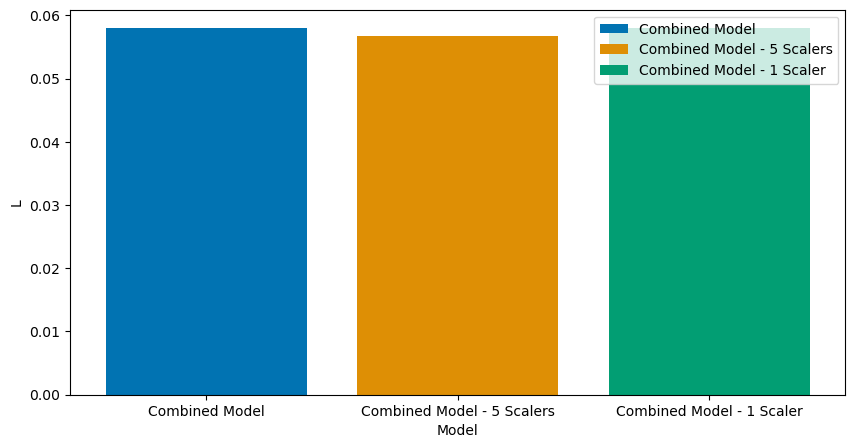

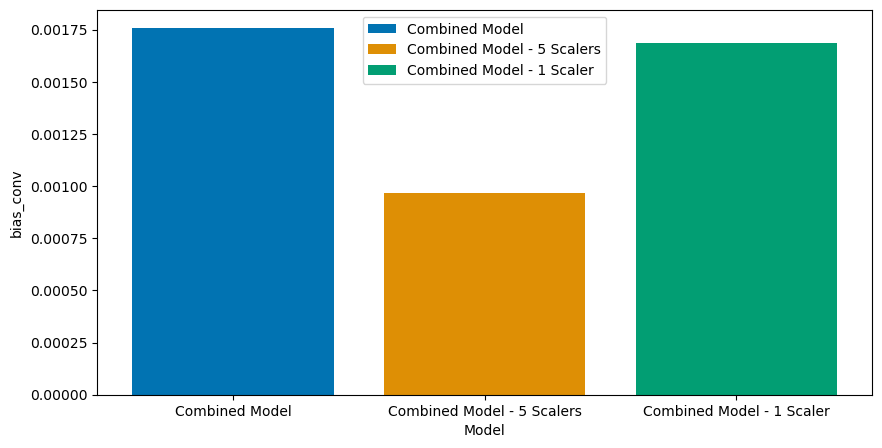

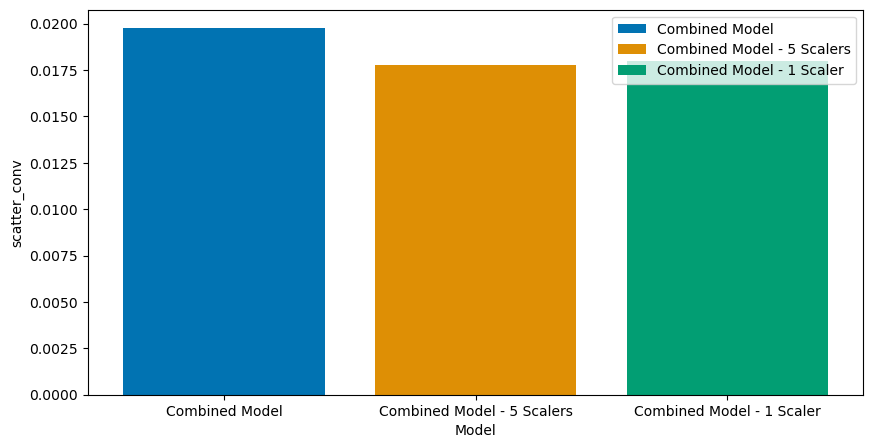

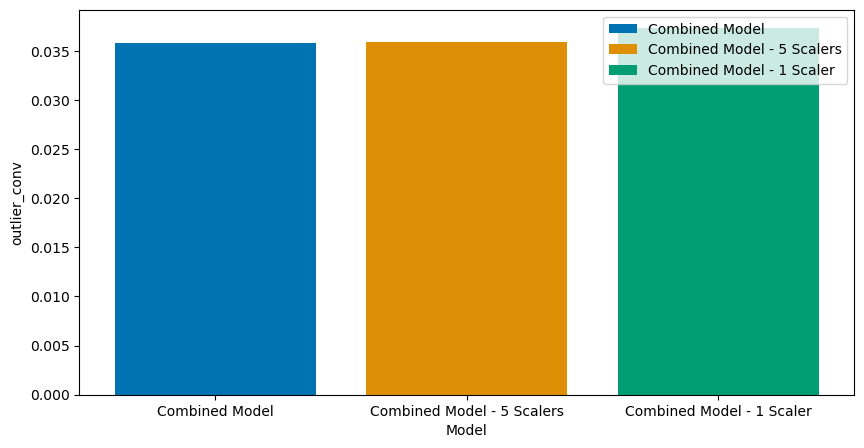

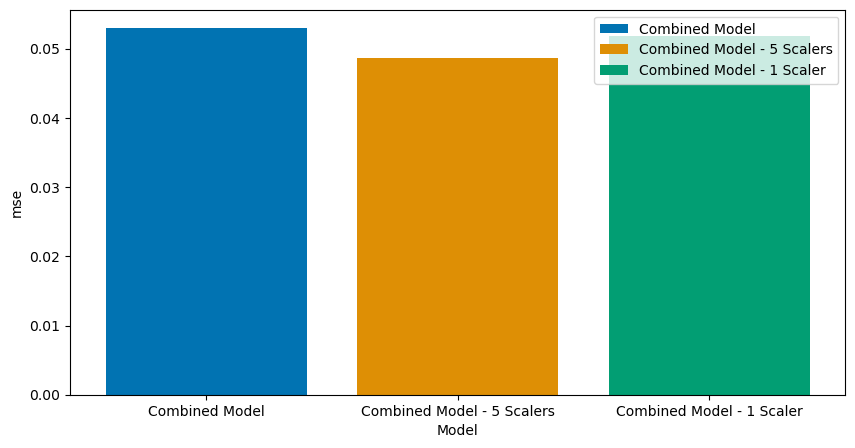

In [3]:
combined_cnn = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v15/testing_metrics.csv')
combined_cnn_norm = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v24/testing_metrics.csv')
combined_cnn_norm2 = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v23/testing_metrics.csv')
combined_cnn_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v15/testing_predictions.csv')
combined_cnn_norm_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v24/testing_predictions.csv')
combined_cnn_norm_preds2 = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v23/testing_predictions.csv')
combined_cnn_binned =  get_point_metrics(combined_cnn_preds['photoz'], y_test, binned=True)
combined_cnn_norm_binned =  get_point_metrics(combined_cnn_norm_preds['photoz'], y_test, binned=True)
combined_cnn_norm_binned2 =  get_point_metrics(combined_cnn_norm_preds2['photoz'], y_test, binned=True)
compare_point_metrics_bar([combined_cnn,combined_cnn_norm,combined_cnn_norm2], ['Combined Model', 'Combined Model - 5 Scalers', 'Combined Model - 1 Scaler'])


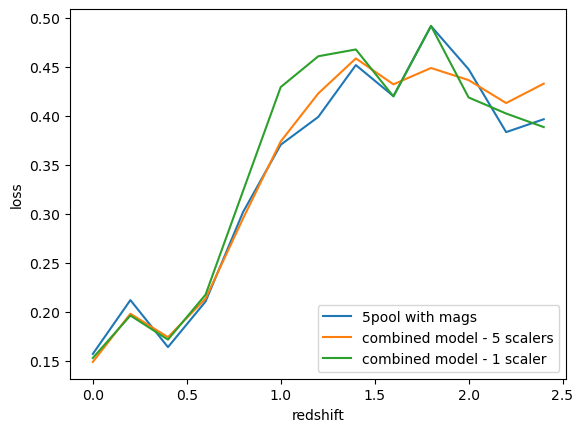

In [4]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_binned['L'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned['L'][0:13]), label='combined model - 5 scalers')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned2['L'][0:13]), label='combined model - 1 scaler')
plt.ylabel('loss')
plt.xlabel('redshift')
plt.legend()

/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


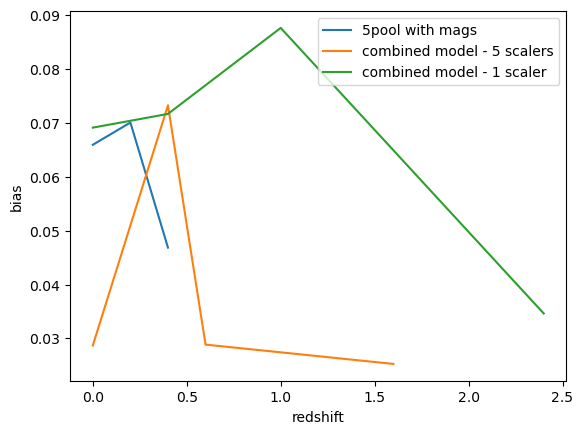

In [5]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_binned['bias_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned['bias_conv'][0:13]), label='combined model - 5 scalers')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned2['bias_conv'][0:13]), label='combined model - 1 scaler')
plt.ylabel('bias')
plt.xlabel('redshift')
plt.legend()

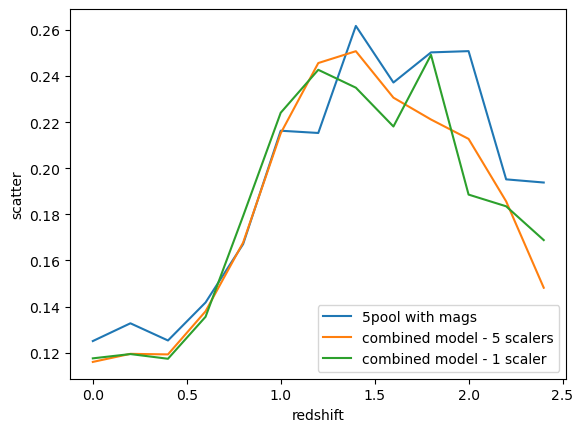

In [6]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_binned['scatter_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned['scatter_conv'][0:13]), label='combined model - 5 scalers')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned2['scatter_conv'][0:13]), label='combined model - 1 scaler')
plt.ylabel('scatter')
plt.xlabel('redshift')
plt.legend()

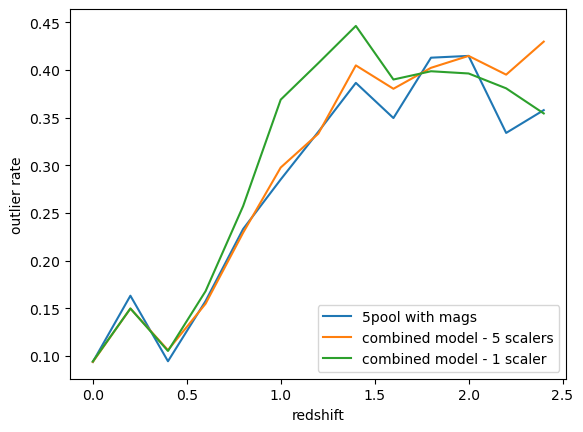

In [7]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_binned['outlier_conv'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned['outlier_conv'][0:13]), label='combined model - 5 scalers')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned2['outlier_conv'][0:13]), label='combined model - 1 scaler')
plt.ylabel('outlier rate')
plt.xlabel('redshift')
plt.legend()

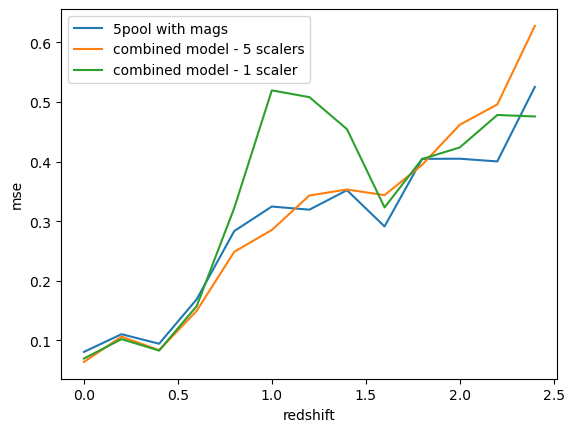

In [8]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_binned['mse'][0:13]), label='5pool with mags')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned['mse'][0:13]), label='combined model - 5 scalers')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_cnn_norm_binned2['mse'][0:13]), label='combined model - 1 scaler')
plt.ylabel('mse')
plt.xlabel('redshift')
plt.legend()